In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas


In [12]:
#read hail pixel data
hailpx_major_px = np.load('all_major.npy')
hailpx_minor_px = np.load('all_minor.npy')
#read hail pad data
df = pandas.read_csv('pad144-2.csv', header=None)
as_dict = df.to_dict(orient='list')
pad_major_mm = np.array(as_dict[0])
pad_minor_mm = np.array(as_dict[1])

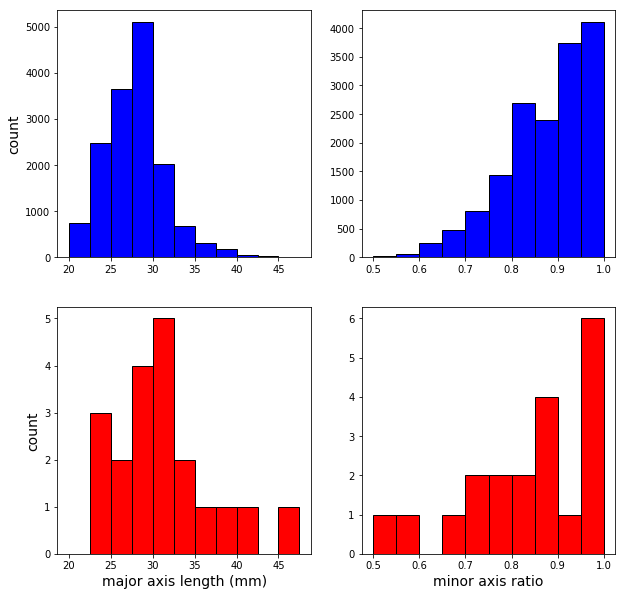

In [22]:
#apply scaling to hailpixel data
pixel_scaling = 2.54 #mm/pixel
hailpx_major_mm = hailpx_major_px*pixel_scaling
hailpx_minor_mm = hailpx_minor_px*pixel_scaling

# init plot
fig = plt.figure(facecolor='white',figsize=[10, 10])

plt.subplot(2, 2, 1)
plt.hist(hailpx_major_mm, color = 'blue', edgecolor = 'black', bins=np.arange(20,50,2.5))
plt.ylabel('count',fontsize=14)

plt.subplot(2, 2, 2)
plt.hist(hailpx_minor_mm/hailpx_major_mm, color = 'blue', edgecolor = 'black', bins=np.arange(0.5,1.05,0.05))

plt.subplot(2, 2, 3)
plt.hist(pad_major_mm, color = 'red', edgecolor = 'black', bins=np.arange(20,50,2.5))
plt.xlabel('major axis length (mm)',fontsize=14)
plt.ylabel('count',fontsize=14)

plt.subplot(2, 2, 4)
plt.hist(pad_minor_mm/pad_major_mm, color = 'red', edgecolor = 'black', bins=np.arange(0.5,1.05,0.05))
plt.xlabel('minor axis ratio',fontsize=14)

plt.savefig('compare_hist', dpi=150)
